In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


🏷️ Import Packages
Import BetaGeoFitter to estimate customer survival probabilities;
GammaGammaFitter to estimate average purchase amounts/ average profit.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

🏷️ data formatting

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

🏷️ load data

In [5]:
df = pd.read_excel('/Users/ivoy/Downloads/RetailSales.xlsx')
df_2017_2020=df.copy()
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.100,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.600,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.500,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.900,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.400,1476.144


🏷️ data checking

In [6]:
df.shape

(7991, 16)

In [7]:
df.columns
df.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
_SalesTeamID                 int64
_CustomerID                  int64
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
dtype: object

In [8]:
df.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
count,7991.000,7991.000,7991.000,7991.000,7991.000,7991.000,7991.000,7991.000
mean,14.384,25.457,183.850,23.772,4.525,0.114,2284.537,1431.911
std,7.986,14.415,105.904,13.527,2.313,0.086,1673.096,1112.413
min,1.000,1.000,1.000,1.000,1.000,0.050,167.500,68.675
25%,8.000,13.000,91.000,12.000,3.000,0.050,1031.800,606.115
50%,14.000,25.000,183.000,24.000,5.000,0.075,1849.200,1080.576
75%,21.000,38.000,276.000,36.000,7.000,0.150,3611.300,2040.251
max,28.000,50.000,367.000,47.000,8.000,0.400,6566.000,5498.556


🏷️ Data Cleaning and Preparation

In [9]:
# check null value

df.isnull().sum()

# if there exist null
# df.dropna(inplace=True)

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
dtype: int64

In [10]:
# drop irrelevant columns

df.drop(['WarehouseCode','ProcuredDate','ShipDate','DeliveryDate','CurrencyCode','_SalesTeamID','_StoreID','Discount Applied'], axis=1, inplace=True)

In [11]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [12]:
# 🌟 implace _ProductID with Product Name

productnametable = pd.read_excel('/Users/ivoy/Downloads/productname.xlsx')

#left join to create a new dataframe
product_name = df.merge(productnametable, on='_ProductID', how='left')

df['_ProductID'] = product_name['Product Name']

In [13]:
#implace _CustomerID with Customer Name

customernametable = pd.read_excel('/Users/ivoy/Downloads/customernames.xlsx')

#left join to create a new dataframe
customer_name = df.merge(customernametable, on='_CustomerID', how='left')

df['_CustomerID'] = customer_name['Customer Names']

In [14]:
# Rename the column
df.rename(columns={'_ProductID': 'Product Name'}, inplace=True)

In [15]:
df.rename(columns={'_CustomerID': 'Customer Name'}, inplace=True)

In [16]:
df.head()

,OrderNumber,Sales Channel,OrderDate,Customer Name,Product Name,Order Quantity,Unit Price,Unit Cost
0,SO - 000101,In-Store,2018-05-31,Rochester Ltd,Dining Furniture,5,1963.100,1001.181
1,SO - 000102,Online,2018-05-31,Pacific Ltd,Wreaths,3,3939.600,3348.660
2,SO - 000103,Distributor,2018-05-31,"3LAB, Ltd",Stemware,1,1775.500,781.220
3,SO - 000104,Wholesale,2018-05-31,"Fenwal, Corp",Accessories,8,2324.900,1464.687
4,SO - 000105,Distributor,2018-05-31,Bare,Candles,8,1822.400,1476.144


In [17]:
#Checking for duplicates

df.loc[df.duplicated()]

,OrderNumber,Sales Channel,OrderDate,Customer Name,Product Name,Order Quantity,Unit Price,Unit Cost


In [18]:
# Outlier

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [19]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

🏷️ Exploratory Data Analysis + Visualization

1⃣️ Univariate analysis (Plotting Feature Distributions)
--- Histogram
--- KDE(kernel density estimation) plot
--- Boxplot

In [20]:
df['Sales Channel'].value_counts()

In-Store       3298
Online         2425
Distributor    1375
Wholesale       893
Name: Sales Channel, dtype: int64

In [21]:
# Calculate Each Product Total Sold Quantity

df_product = df.groupby('Product Name').agg({'Order Quantity':'sum'}) # ⚠️ use ‘sum’ instead of ‘count’
# （optional）：df_product.reset_index(inplace=True)

df_product

,Order Quantity
Product Name,
Accessories,956
Audio,680
Bakeware,777
Bar Tools,798
Baseball,772
Basketball,644
Bathroom Furniture,811
Bean Bags,652
Bedroom Furniture,635


In [22]:
# Calculate Each Product Total Sales

df_totalsales = df.groupby('Product Name').agg({'Unit Price':'sum'})
df_totalsales.rename(columns={'Unit Price': 'Total Sales Each Product'}, inplace=True)
df_totalsales

,Total Sales Each Product
Product Name,
Accessories,464196.100
Audio,350121.900
Bakeware,375052.600
Bar Tools,376466.300
Baseball,362001.000
Basketball,396666.800
Bathroom Furniture,435607.200
Bean Bags,308253.600
Bedroom Furniture,329325.100


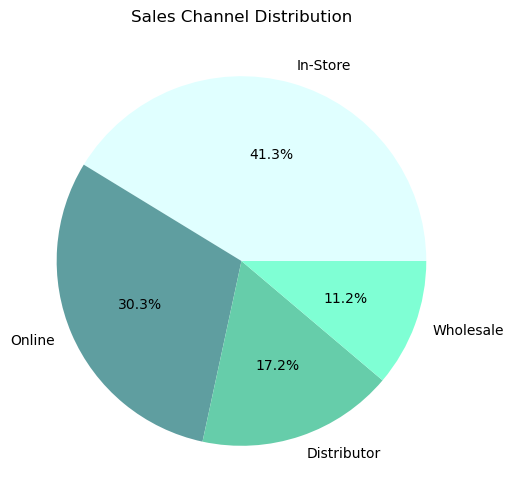

In [23]:

channel_counts = df['Sales Channel'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', colors=['#E0FFFF', '#5F9EA0', '#66CDAA', '#7FFFD4'])
plt.title('Sales Channel Distribution')
plt.show()

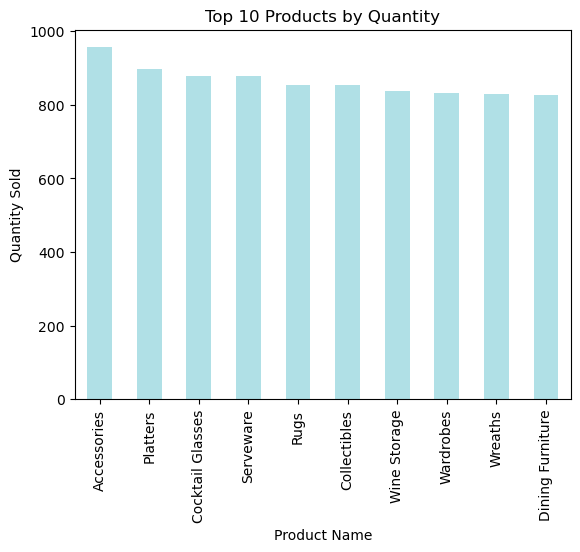

In [26]:
top_10_products = df_product.sort_values(by="Order Quantity", ascending=False).head(10)


ax = top_10_products.plot(kind='bar', title='Top 10 Products by Quantity', color='#B0E0E6',legend=False)

ax.set_xlabel('Product Name')
ax.set_ylabel('Quantity Sold')

plt.show()

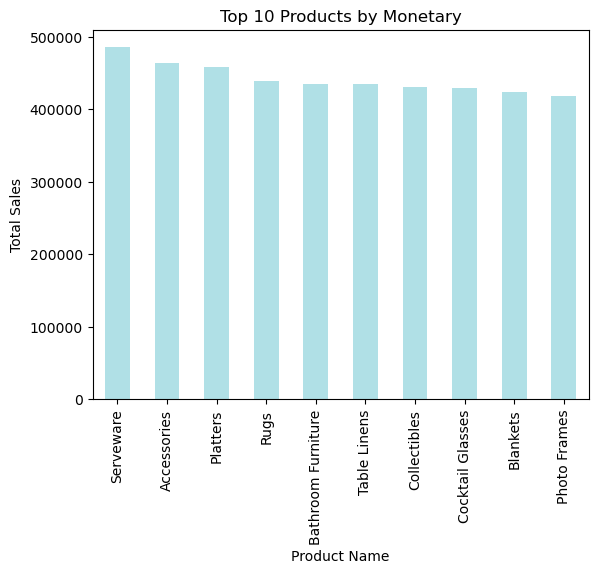

In [27]:
top_10_product_sales = df_totalsales.sort_values(by="Total Sales Each Product", ascending=False).head(10)

ax = top_10_product_sales.plot(kind='bar', title='Top 10 Products by Monetary',color='#B0E0E6' , legend=False)

ax.set_xlabel('Product Name')
ax.set_ylabel('Total Sales')

plt.show()

Text(0.5, 0, 'Product Price($)')

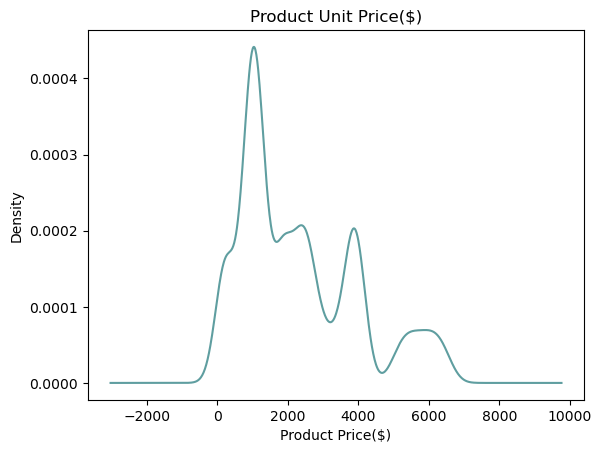

In [28]:
ax = df['Unit Price'].plot(kind='kde',
                          title='Product Unit Price($)',color='#5F9EA0')
ax.set_xlabel('Product Price($)')

2⃣️ Multivariate analysis (Plotting Feature Relation)
--- Correlation Matrix Plot
--- Scatterplot
--- Heatmap Correlation
--- Pairplot
--- Groupby comparisons

🏷️ RFM Calculation

`'monetary', 'recency', 'T', 'frequency'`

- recency: the last purchase date of all customers -- the customer's last purchase date
- T: the age of the client in the company（tenure）
- frequency: total number of repeat purchases
- monetary: purchase avenue per customer

In [29]:
# total sales per transaction
df["TotalSales"] = df["Unit Price"] * df["Order Quantity"]

df.head()

,OrderNumber,Sales Channel,OrderDate,Customer Name,Product Name,Order Quantity,Unit Price,Unit Cost,TotalSales
0,SO - 000101,In-Store,2018-05-31,Rochester Ltd,Dining Furniture,5,1963.100,1001.181,9815.500
1,SO - 000102,Online,2018-05-31,Pacific Ltd,Wreaths,3,3939.600,3348.660,11818.800
2,SO - 000103,Distributor,2018-05-31,"3LAB, Ltd",Stemware,1,1775.500,781.220,1775.500
3,SO - 000104,Wholesale,2018-05-31,"Fenwal, Corp",Accessories,8,2324.900,1464.687,18599.200
4,SO - 000105,Distributor,2018-05-31,Bare,Candles,8,1822.400,1476.144,14579.200


In [30]:
df['OrderDate'].max()
# the most recent order date


Timestamp('2020-12-30 00:00:00')

In [31]:
MostRecentDate = df['OrderDate'].max()

In [68]:
df.tail()

,OrderNumber,Sales Channel,OrderDate,Customer Name,Product Name,Order Quantity,Unit Price,Unit Cost,TotalSales
7986,SO - 0008087,In-Store,2020-12-30,Weimei Corp,Pendants,1,234.500,121.940,234.500
7987,SO - 0008088,Online,2020-12-30,"Apotheca, Ltd",Table Lamps,6,3202.600,1921.560,19215.600
7988,SO - 0008089,Online,2020-12-30,OHTA'S Corp,Table Linens,5,3825.700,2792.761,19128.500
7989,SO - 0008090,Online,2020-12-30,Llorens Ltd,Clocks,8,1072.000,804.000,8576.000
7990,SO - 0008091,In-Store,2020-12-30,Weimei Corp,Festive,5,2211.000,1370.820,11055.000


In [69]:
today_date = dt.datetime(2021, 2, 1)
# set today date as 2021-2-1 for convenience

In [70]:
rfm = df.groupby('Customer Name').agg({'OrderDate': [lambda date: (MostRecentDate - date.max()).days, # reccency
                                                         lambda date: (today_date - date.min()).days], # “T”
                                         'OrderNumber': lambda num: num.nunique(), #Unique Order Number of Each Customer as frequency
                                         'TotalSales': lambda TotalSales: TotalSales.sum()}) # Total Comsumption Each Customer


rfm.reset_index(inplace=True)
rfm.columns = rfm.columns.droplevel(0)
rfm.columns = ['Customer Name','recency', 'T', 'frequency', 'monetary']
rfm.head(10)

,Customer Name,recency,T,frequency,monetary
0,21st Ltd,13,976,158,1763942.500
1,"3LAB, Ltd",1,977,135,1547773.700
2,Amylin Group,8,974,145,1555070.000
3,Apollo Ltd,4,976,178,1883410.200
4,"Apotheca, Ltd",0,974,179,2112221.900
5,Ascend Ltd,6,970,150,1413988.100
6,AuroMedics Corp,9,960,152,1622257.600
7,Avon Corp,7,969,152,1322278.500
8,Bare,5,977,152,1503466.600
9,Burt's Corp,21,974,151,1429960.900


Due to the low sample amouts, we can't use BN-GBD and Gamma model to segment customer or predict.

🏷️ Customer Segmentation (K-Means)

In [37]:
df_rfm_ana=rfm.drop(columns='Customer Name')

In [38]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler((0, 1))
rfm_scaled = mms.fit_transform(df_rfm_ana)

# Convert the scaled array back to a DataFrame
rfm_df = pd.DataFrame(rfm_scaled, columns=df_rfm_ana.columns)

In [39]:
rfm_df.drop(columns='T',inplace=True)

In [40]:
rfm_df.head()

,recency,frequency,monetary
0,0.464,0.307,0.477
1,0.036,0.000,0.244
2,0.286,0.133,0.251
3,0.143,0.573,0.606
4,0.000,0.587,0.853


In [41]:
# Obtain the Optimum Number of Clusters --Elbow Method

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

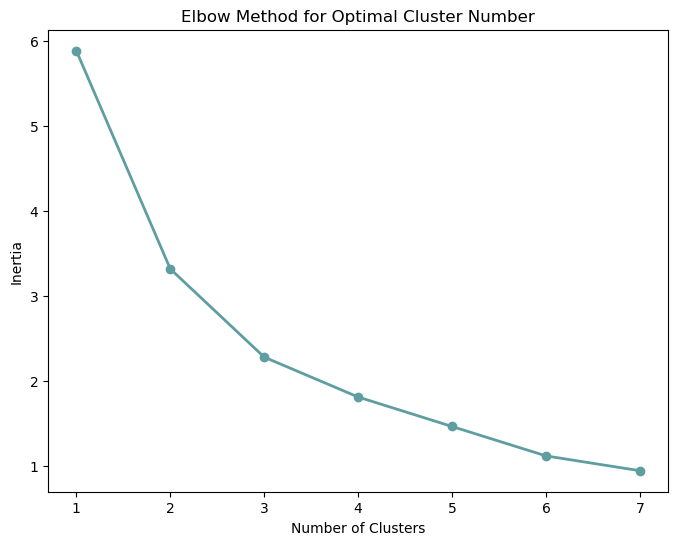

In [42]:
clusternum = range(1, 8)  
inertia_values = []

# Calculate the inertia for each cluster number
for k in clusternum:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=0).fit(rfm_df)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(clusternum, inertia_values, color='#5F9EA0', marker='o', linestyle='-', linewidth=2)
plt.title("Elbow Method for Optimal Cluster Number")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [43]:
clusters_choice = [3, 4, 5]  

cluster_results = rfm_df.copy()

for num in clusters_choice:
    kmeans = KMeans(n_clusters=num,n_init=10, random_state=0)
    cluster_results[f'Cluster_{num}'] = kmeans.fit_predict(rfm_df)

In [44]:
cluster_results.head(15)

,recency,frequency,monetary,Cluster_3,Cluster_4,Cluster_5
0,0.464,0.307,0.477,2,2,0
1,0.036,0.000,0.244,0,0,2
2,0.286,0.133,0.251,0,0,2
3,0.143,0.573,0.606,1,1,3
4,0.000,0.587,0.853,1,1,3
5,0.214,0.200,0.099,0,0,2
6,0.321,0.227,0.324,0,2,0
7,0.250,0.227,0.000,0,0,2
8,0.179,0.227,0.196,0,0,2
9,0.750,0.213,0.116,2,3,4


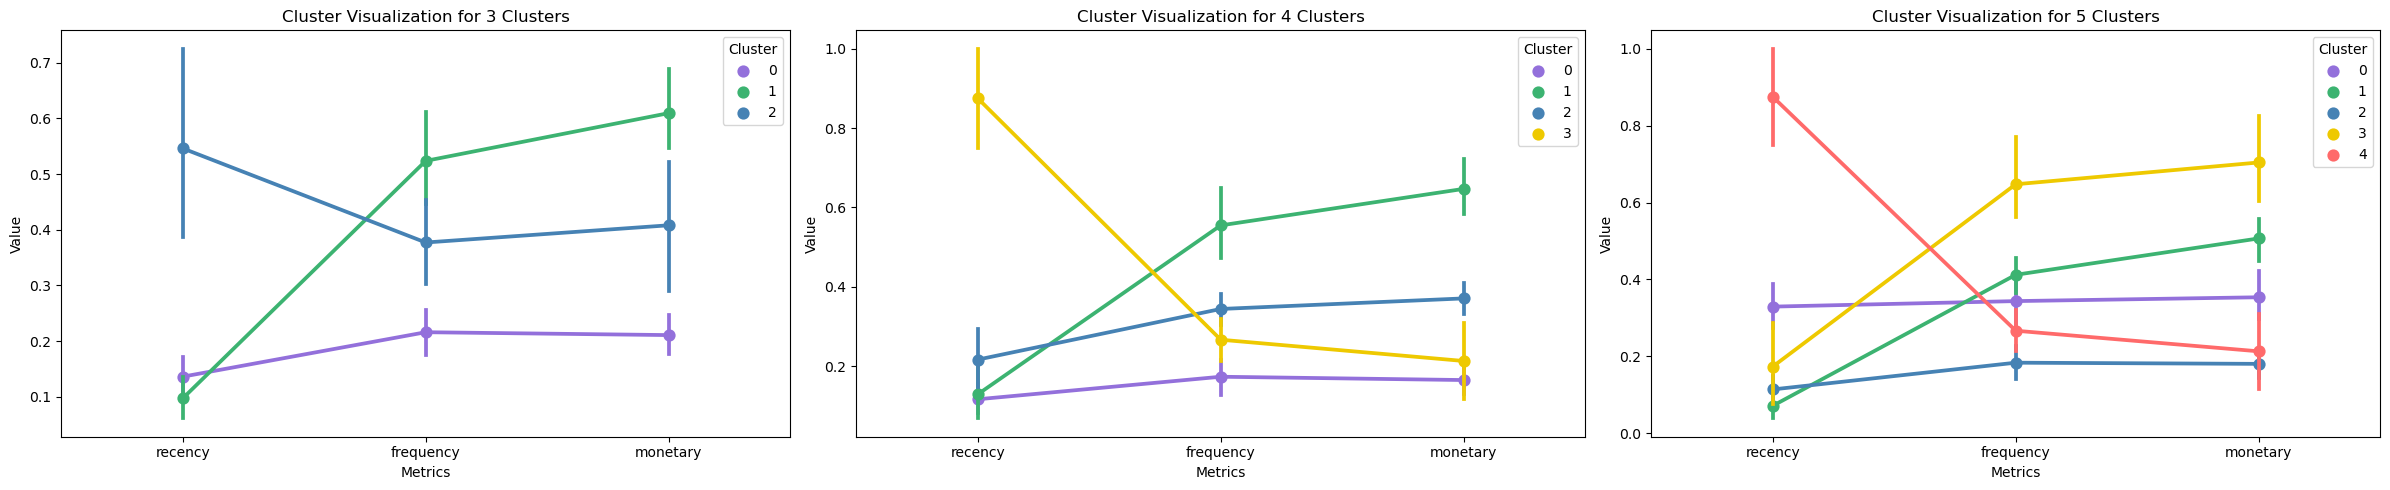

In [45]:
colors = ['#9370DB', '#3CB371', '#4682B4','#EEC900','#FF6A6A']

fig, axes = plt.subplots(1, len(clusters_choice), figsize=(24, 5))

for idx, num in enumerate(clusters_choice):
    cluster_col = f'Cluster_{num}'
    
    # Create a DataFrame containing scaled values and cluster labels
    df_for_plot = rfm_df.copy()
    df_for_plot['Cluster'] = cluster_results[cluster_col]
    
    # Melt data into long format
    df_melt = pd.melt(df_for_plot, id_vars=['Cluster'], value_vars=['recency', 'frequency', 'monetary'], var_name='Metric', value_name='Value')
    
 
    ax = sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster', palette=colors, ax=axes[idx])
    ax.set_title(f'Cluster Visualization for {num} Clusters')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [71]:
cluster_results.rename(columns={
    'recency': 'r',
    'frequency': 'f',
    'monetary': 'm'
}, inplace=True)

In [73]:
cluster_results.head(15)

,r,f,m,Cluster_3,Cluster_4,Cluster_5
0,0.464,0.307,0.477,2,2,0
1,0.036,0.000,0.244,0,0,2
2,0.286,0.133,0.251,0,0,2
3,0.143,0.573,0.606,1,1,3
4,0.000,0.587,0.853,1,1,3
5,0.214,0.200,0.099,0,0,2
6,0.321,0.227,0.324,0,2,0
7,0.250,0.227,0.000,0,0,2
8,0.179,0.227,0.196,0,0,2
9,0.750,0.213,0.116,2,3,4


In [74]:
rfm_result = pd.concat([rfm, cluster_results], axis=1)

In [75]:
rfm_result.drop(columns=['Cluster_3','Cluster_5','T'],inplace=True)

In [76]:
rfm_result.head(15)

,Customer Name,recency,frequency,monetary,r,f,m,Cluster_4
0,21st Ltd,13,158,1763942.500,0.464,0.307,0.477,2
1,"3LAB, Ltd",1,135,1547773.700,0.036,0.000,0.244,0
2,Amylin Group,8,145,1555070.000,0.286,0.133,0.251,0
3,Apollo Ltd,4,178,1883410.200,0.143,0.573,0.606,1
4,"Apotheca, Ltd",0,179,2112221.900,0.000,0.587,0.853,1
5,Ascend Ltd,6,150,1413988.100,0.214,0.200,0.099,0
6,AuroMedics Corp,9,152,1622257.600,0.321,0.227,0.324,2
7,Avon Corp,7,152,1322278.500,0.250,0.227,0.000,0
8,Bare,5,152,1503466.600,0.179,0.227,0.196,0
9,Burt's Corp,21,151,1429960.900,0.750,0.213,0.116,3


In [77]:
rfm_result.groupby(['Cluster_4']).agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': 'mean'
    }).round(0)


,recency,frequency,monetary
Cluster_4,,,
0,3.000,148.000,1475066.000
1,4.000,177.000,1921308.000
2,6.000,161.000,1665642.000
3,24.000,155.000,1519597.000


-- 4 clusters 
0: Recent Customers and Promising
1: High Value and Loyal Customer
2: Potential Customer
3: Lost Customer

In [80]:
rfm_result.groupby(['Cluster_4']).agg({'Customer Name':'count'})

,Customer Name
Cluster_4,
0,19
1,13
2,16
3,2


In [91]:
cluster_amount=rfm_result.groupby(['Cluster_4']).agg({'Customer Name':'count'})

In [93]:
data = {
    'Cluster_4': [0, 1, 2, 3],
    'cluster feature': [
        'Recent Customers and Promising',
        'High Value and Loyal Customer',
        'Potential Customer',
        'Lost Customer'
    ]
}

df_cluster_results = pd.DataFrame(data)

In [94]:
df_cluster_results

,Cluster_4,cluster feature
0,0,Recent Customers and Promising
1,1,High Value and Loyal Customer
2,2,Potential Customer
3,3,Lost Customer


In [92]:
cluster_amount

,Customer Name
Cluster_4,
0,19
1,13
2,16
3,2


In [96]:
df_cluster_results=df_cluster_results.merge(cluster_amount, on='Cluster_4',how='left')

In [101]:
df_cluster_results.rename(columns={'Customer Name': 'Customer Number'}, inplace=True)

In [102]:
df_cluster_results

,Cluster_4,cluster feature,Customer Number
0,0,Recent Customers and Promising,19
1,1,High Value and Loyal Customer,13
2,2,Potential Customer,16
3,3,Lost Customer,2


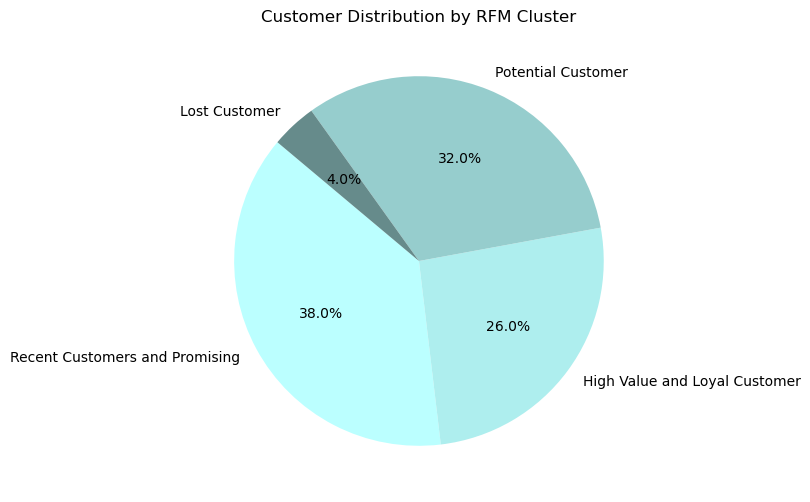

In [103]:
cluster_feature = df_cluster_results['cluster feature']
customer_number = df_cluster_results['Customer Number']

plt.figure(figsize=(8, 6))
plt.pie(customer_number, labels=cluster_feature, autopct='%1.1f%%', startangle=140, colors=['#BBFFFF', '#AEEEEE', '#96CDCD', '#668B8B'])
plt.title('Customer Distribution by RFM Cluster')

plt.show()
